# **Blindness Detection Project**

## **Dataset Description**

This project aims to detect "Diabetic Retinopathy (DR)" to stop blindness at early stage.

A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

<ul>
<li>0 - No DR</li>
<li>1 - Mild</li>
<li>2 - Moderate</li>
<li>3 - Severe</li>
<li>4 - Proliferative DR (Worst Case)</li>
</ul>

**Dataset Source -** *https://www.kaggle.com/competitions/aptos2019-blindness-detection/data?select=train_images*

**What is Diabetic Retinopathy?**

Diabetic retinopathy is an eye condition that can cause vision loss and blindness in people who have diabetes. It affects blood vessels in the retina (the light-sensitive layer of tissue in the back of your eye).

**Symptoms**

<ul>
<li>Early Symptoms: None</li>
<li>Later Symptoms: Blurry Vision, floating spots in vision, blindness</li>
</ul>

**Diagnosis -** Dilated eye exam
<br>
**Treatment -** Injections, laser treatment, surgery
<br>
**Source -** *https://www.nei.nih.gov/learn-about-eye-health/eye-conditions-and-diseases/diabetic-retinopathy*

## **Importing Dependencies**

In [1]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import shutil
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
from PIL import Image

## **Dataset Setup**

**Step 1: Setting the Directory**

In [2]:
# Base directory
base_dir = '/Users/reemikadas/Desktop/SCU MSBA/Github/Machine-Learning-Projects/Project 7_Blindness Detection using Deep Learning'

# Data Directory
data_dir = os.path.join(base_dir, 'Data')

# --- Train Set ---
train_img_dir = os.path.join(data_dir, 'train_data')
train_csv_path = os.path.join(data_dir, 'train_data.csv')

# --- Validation Set ---
val_img_dir = os.path.join(data_dir, 'val_data')
val_csv_path = os.path.join(data_dir, 'val_data.csv')

# --- Test Set ---
test_img_dir = os.path.join(data_dir, 'test_data')
test_csv_path = os.path.join(data_dir, 'test_data.csv')

**Step 2: Loading the Datasets and Mapping the Image with its Label**

In [3]:
# Loading the CSV Files
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)
test_df = pd.read_csv(test_csv_path)

# Glimpse of the Train Dataframe
train_df.head()

,id_code,diagnosis,image_path
0,c76664770c07,3,/content/drive/MyDrive/Quarter_4_SCU/Deep_Lear...
1,7b29e3783919,3,/content/drive/MyDrive/Quarter_4_SCU/Deep_Lear...
2,cd3fd04d72f5,2,/content/drive/MyDrive/Quarter_4_SCU/Deep_Lear...
3,f64b6e85f1c9,0,/content/drive/MyDrive/Quarter_4_SCU/Deep_Lear...
4,00f6c1be5a33,0,/content/drive/MyDrive/Quarter_4_SCU/Deep_Lear...


In [4]:
# Dropping the Image_path
train_df.drop('image_path', axis=1, inplace = True)
val_df.drop('image_path', axis=1, inplace = True)
test_df.drop('image_path', axis=1, inplace = True)

# Verify
train_df.columns
val_df.columns
test_df.columns

Index(['id_code', 'diagnosis'], dtype='object')

Index(['id_code', 'diagnosis'], dtype='object')

Index(['id_code', 'diagnosis'], dtype='object')

In [5]:
# Get all File Extensions

# -- Training Set Extensions --
train_extensions = set()

for train_img in os.listdir(train_img_dir):
  train_ext = os.path.splitext(train_img)[1].lower()

  if train_ext != '':
    train_extensions.add(train_ext)
print("Unique file extensions found in Training Image folder: {}".format(train_extensions))

# -- Test Set Extensions --
test_extensions = set()

for test_img in os.listdir(test_img_dir):
  test_ext = os.path.splitext(test_img)[1].lower()

  if test_ext != '':
    test_extensions.add(test_ext)
print("Unique file extensions found in Test Image folder: {}".format(test_extensions))

Unique file extensions found in Training Image folder: {'.png'}
Unique file extensions found in Test Image folder: {'.png'}


In [6]:
# Append the .png extension and join with folder path
train_df['image_path'] = train_df['id_code'].apply(lambda x: os.path.join(train_img_dir, f"{x}.png"))
val_df['image_path']   = val_df['id_code'].apply(lambda x: os.path.join(val_img_dir, f"{x}.png"))
test_df['image_path']  = test_df['id_code'].apply(lambda x: os.path.join(test_img_dir, f"{x}.png"))

train_df.head()

,id_code,diagnosis,image_path
0,c76664770c07,3,/Users/reemikadas/Desktop/SCU MSBA/Github/Mach...
1,7b29e3783919,3,/Users/reemikadas/Desktop/SCU MSBA/Github/Mach...
2,cd3fd04d72f5,2,/Users/reemikadas/Desktop/SCU MSBA/Github/Mach...
3,f64b6e85f1c9,0,/Users/reemikadas/Desktop/SCU MSBA/Github/Mach...
4,00f6c1be5a33,0,/Users/reemikadas/Desktop/SCU MSBA/Github/Mach...


**Step 3: Verifying the Missing Data**

In [7]:
missing_train = [p for p in train_df['image_path'] if not os.path.exists(p)]
print(f"Missing {len(missing_train)} image files from Train data.")

missing_val = [p for p in val_df['image_path'] if not os.path.exists(p)]
print(f"Missing {len(missing_val)} image files from Validation data.")

missing_test = [p for p in test_df['image_path'] if not os.path.exists(p)]
print(f"Missing {len(missing_test)} image files from Test data.")

Missing 0 image files from Train data.
Missing 0 image files from Validation data.
Missing 0 image files from Test data.


There are no missing images that means we have mapped the labels respective to its images.

## **Data Exploration**

In [8]:
# Verify the total count from train / val / test data
print("Train samples:", len(train_df))
print("Validation samples:", len(val_df))
print("Test samples:", len(test_df))

Train samples: 2662
Validation samples: 200
Test samples: 800


In [9]:
# Define the Class Labels
class_labels = {0:"No DR", 1:"Mild DR", 2:"Moderate DR", 3:"Severe DR", 4:"Proliferative DR"}
print("Class Labels: {}".format(class_labels))

num_classes = list(class_labels.keys())
print("Number of Classes: {}".format(num_classes))

Class Labels: {0: 'No DR', 1: 'Mild DR', 2: 'Moderate DR', 3: 'Severe DR', 4: 'Proliferative DR'}
Number of Classes: [0, 1, 2, 3, 4]


<Figure size 1500x800 with 0 Axes>

<Axes: >

(np.float64(-0.5), np.float64(1049.5), np.float64(1049.5), np.float64(-0.5))

Text(0.5, 1.0, '0 - No DR')

<Axes: >

(np.float64(-0.5), np.float64(1843.5), np.float64(1225.5), np.float64(-0.5))

Text(0.5, 1.0, '1 - Mild DR')

<Axes: >

(np.float64(-0.5), np.float64(1503.5), np.float64(999.5), np.float64(-0.5))

Text(0.5, 1.0, '2 - Moderate DR')

<Axes: >

(np.float64(-0.5), np.float64(2587.5), np.float64(1957.5), np.float64(-0.5))

Text(0.5, 1.0, '3 - Severe DR')

<Axes: >

(np.float64(-0.5), np.float64(3215.5), np.float64(2135.5), np.float64(-0.5))

Text(0.5, 1.0, '4 - Proliferative DR')

<Axes: >

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

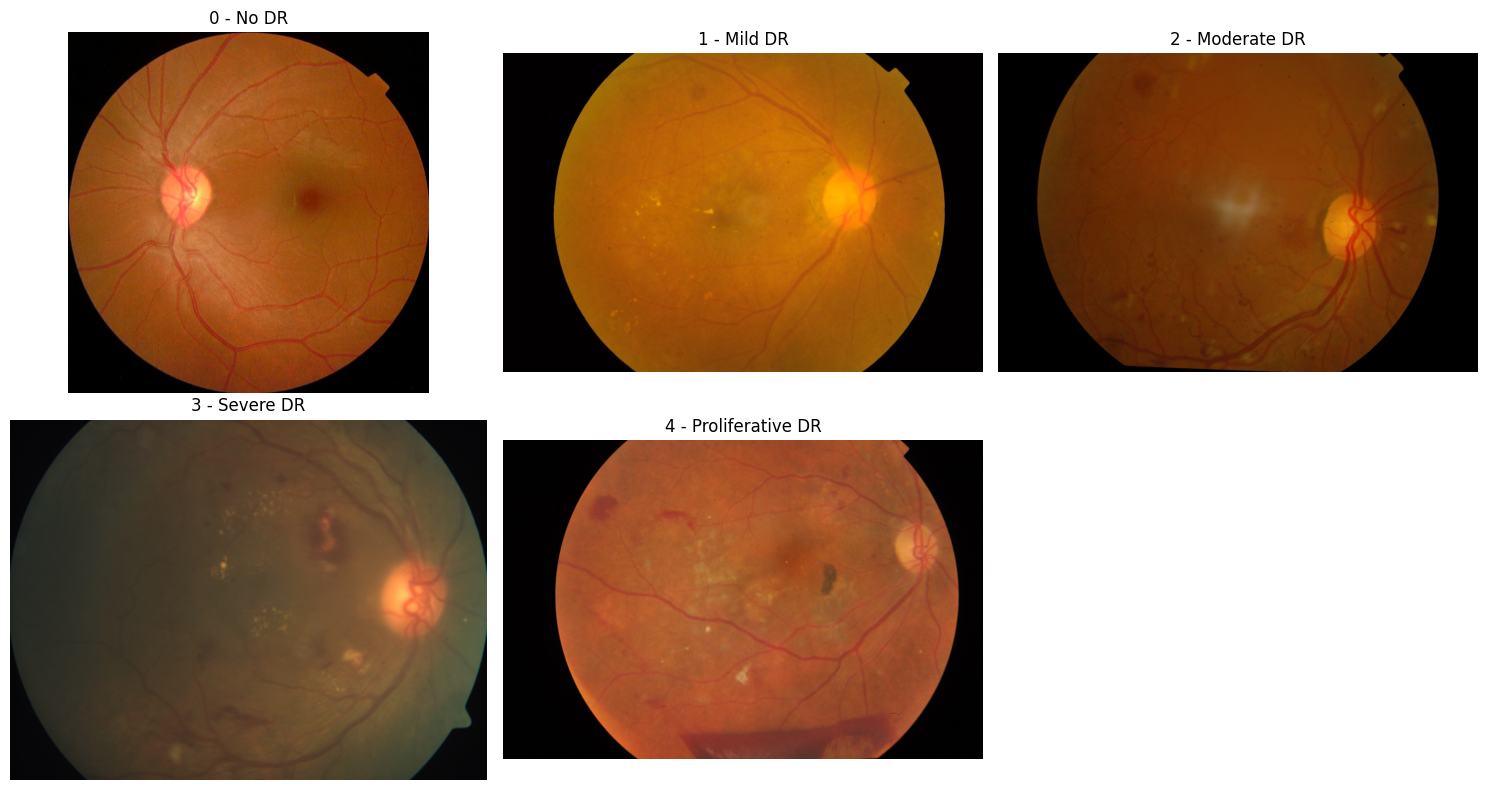

In [10]:
# Display the sample images

plt.figure(figsize = (15,8))

for i, cls in enumerate(sorted(train_df['diagnosis'].unique())):
  sample = train_df[train_df['diagnosis'] == cls].iloc[0]
  img = Image.open(sample['image_path'])

  plt.subplot(2, 3, i + 1)
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"{cls} - {class_labels[cls]}")

plt.subplot(2,3,6)
plt.axis('off')
plt.tight_layout()
plt.show()

From the above images, we can observed that the size of the images are not consistent.

In [11]:
# Verifying the unique image sizes and their respective counts

# -- Function --
def image_size_counts(img_dir):
  size_counter = Counter()
  for file in os.listdir(img_dir):
    if file.lower().endswith('.png'):
      img_path = os.path.join(img_dir, file)
      try:
        with Image.open(img_path) as img:
          size_counter[img.size] += 1
      except:
        pass
  return size_counter

# Train Data
train_size_counts = image_size_counts(train_img_dir)

print("Training Set image sizes and counts: \n")

for size, count in train_size_counts.most_common():
  print(f"Number of images of {size} size: {count}")

Training Set image sizes and counts: 

Number of images of (1050, 1050) size: 696
Number of images of (2416, 1736) size: 489
Number of images of (2588, 1958) size: 388
Number of images of (3216, 2136) size: 282
Number of images of (2048, 1536) size: 261
Number of images of (819, 614) size: 208
Number of images of (3388, 2588) size: 99
Number of images of (1504, 1000) size: 70
Number of images of (1844, 1226) size: 39
Number of images of (4288, 2848) size: 38
Number of images of (2896, 1944) size: 29
Number of images of (640, 480) size: 28
Number of images of (2144, 1424) size: 21
Number of images of (1476, 1117) size: 11
Number of images of (1467, 1110) size: 2
Number of images of (2146, 1764) size: 1


Given that the dataset contains many different image sizes, ranging from 640 × 480 to 4288 × 2848, it is essential to maintain the anatomical structures and fine vascular details for accurate diabetic retinopathy detection. Therefore, all retinal fundus images will be resized or cropped to 224 × 224 pixels to ensure consistency and preserve essential visual features.

In [12]:
# Check the Class Distribution

# Count the images per class
class_counts = train_df['diagnosis'].value_counts().sort_index()

# Mapping to class names
class_counts_names = {class_labels[k]: v for k,v in class_counts.items()}

print(" Number of images per class: \n")

for cls, count in class_counts_names.items():
  print(f"{cls} - {count}")

 Number of images per class: 

No DR - 1318
Mild DR - 279
Moderate DR - 721
Severe DR - 144
Proliferative DR - 200


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Class Labels')

Text(0, 0.5, 'Number of Images')

Text(0.5, 1.0, 'Number of Images per Class')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'No DR'),
  Text(1, 0, 'Mild DR'),
  Text(2, 0, 'Moderate DR'),
  Text(3, 0, 'Severe DR'),
  Text(4, 0, 'Proliferative DR')])

Text(0.0, 1323, '1318')

Text(1.0, 284, '279')

Text(2.0, 726, '721')

Text(3.0, 149, '144')

Text(4.0, 205, '200')

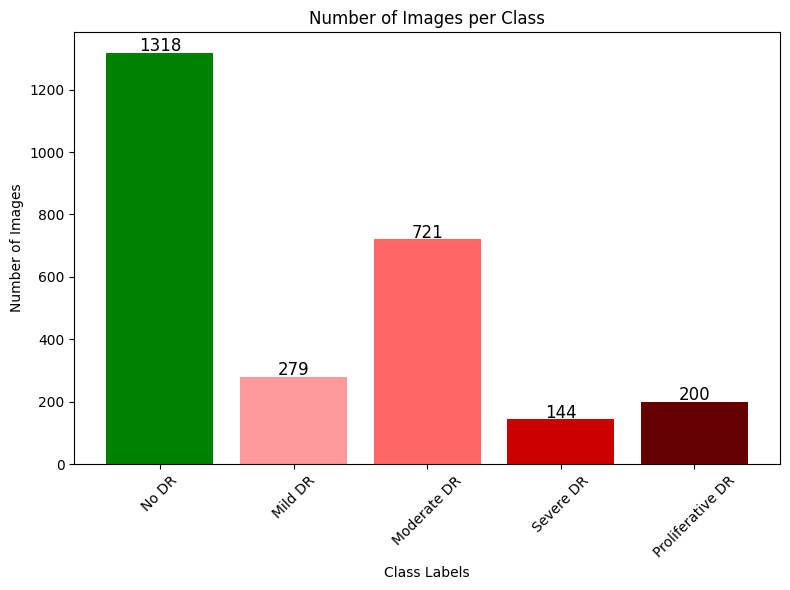

In [13]:
# Visualize the Class Distribution
labels = list(class_counts_names.keys())
counts = list(class_counts_names.values())
colors = ["green", "#FF9999", "#FF6666", "#CC0000", "#660000"]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color = colors)
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=12)

plt.show()

There is a presence of class imbalance as the training dataset is heavily dominated by the *healthy* patient (*No DR*), followed by *Moderate* patients. The *Severe* and *Proliferative* Diabetic Retinopathy categories have significantly fewer images.

From the data exploration, we identified two key issues:

*   Inconsistent image sizes
*   Imbalanced class distribution

To address these challenges, our next step will involve applying data augmentation techniques — both to standardize all images to a consistent shape and to generate diverse variants of training images, helping to balance the dataset and improve model generalization.


This notebook is the end of the **Exploratory Data Analysis** part. The **Data Augmentation** and **Model Building** parts will be continue in further notebooks.